## Versão para teste de SVM

In [13]:
# Importar caminho
import os
import sys
# Adicionando o diretório-raiz do projeto ao sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
# Importar variáveis
from src.features.data_process import x_test, x_train, y_binary_test, y_binary_train

In [16]:
from sklearn.svm import SVC

# 2. Criando o modelo com os parâmetros padrão
svm_v1 = SVC()
svm_v1.fit(x_train, y_binary_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [17]:
# Salvar modelo em models
import joblib

caminho_modelo = f"../models/svm_v1.pkl"
joblib.dump(svm_v1, caminho_modelo)

print(f"Modelo salvo em: {caminho_modelo}")

Modelo salvo em: ../models/svm_v1.pkl


In [7]:
# Fazer previsão
import joblib

# Carregando o modelo salvo da pasta models/
modelo_carregado = joblib.load('../models/svm_v1.pkl')

# Agora você pode usar o modelo para fazer previsões
previsao = modelo_carregado.predict(x_test)

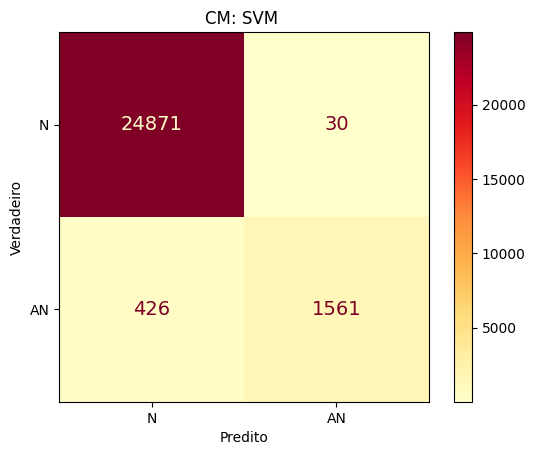

--- Métricas de Desempenho ---
Accuracy: 98.30%
Recall: 78.56%
ROC: 0.8922
F1-Score: 0.8726
Precision: 98.11%
Specificity: 99.88%
------------------------------


In [8]:
# Fazer a análise
from src.models.evaluate_model import evaluate_model
evaluate_model(y_binary_test, previsao, "CM: SVM ")

### Encontrar melhores parâmetros para SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

svm = SVC()

param_grid = {
    "kernel": ["rbf"],
    "C": [0.1, 1, 10],
    "gamma": ["scale", 0.1, 0.01, 0.001] 
}

grid = GridSearchCV(svm, param_grid, cv=5, scoring='recall', n_jobs = -1)

grid.fit(x_train, y_binary_train)

print("Melhores parâmetros:", grid.best_params_)
print("Melhor sensibilidade:", grid.best_score_)

# Salve o melhor modelo encontrado pelo GridSearchCV
caminho_melhor_modelo = '../models/melhor_svm_v1.pkl'
joblib.dump(grid.best_estimator_, caminho_melhor_modelo)

print(f"O melhor modelo foi salvo em: {caminho_melhor_modelo}")


Melhores parâmetros: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Melhor sensibilidade: 0.8707945076814344
O melhor modelo foi salvo em: ../models/svm_v1.pkl


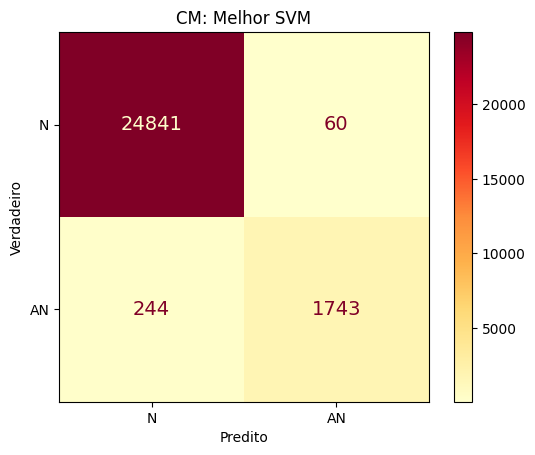

--- Métricas de Desempenho ---
Accuracy: 98.87%
Recall: 87.72%
ROC: 0.9374
F1-Score: 0.9198
Precision: 96.67%
Specificity: 99.76%
------------------------------


In [15]:
# Avaliar melhor modelo
melhor_modelo = joblib.load(caminho_melhor_modelo)

previsao_melhor_modelo = melhor_modelo.predict(x_test)

evaluate_model(y_binary_test, previsao_melhor_modelo, "CM: Melhor SVM")